PRML3章　ベイズ線形回帰の実装

求めたいのものは式(3.58)の予測分布
\begin{eqnarray}
p(t|x,{\bf t},\alpha,\beta)=N(t|m_N^T\phi(x),\sigma_N^2(x))
\end{eqnarray}
基底関数にはガウス基底関数を用いる。
\begin{eqnarray}
\phi_i(x)=exp(-\frac{(x-\mu_i)^2}{2s^2})
\end{eqnarray}
今回はPRML上で基底関数を9個と指定されているのでそれに従う事にする。<br>
なお配置の仕方については特に記載はなかったため適当に配置する事にする。<br>
予測分布の平均、分散を求める式は(3.53)、(3.54)、(3.59)
\begin{eqnarray}
&& m_N=\beta S_N\Phi(x_n)^Tt \\
&& \sigma_N^2(x)=\beta^{-1}+\phi(x)^TS_N\phi(x) \\
&& S_N^{-1}=\alpha I+\beta\Phi^T\Phi
\end{eqnarray}
上記を求め、予測分布を求める

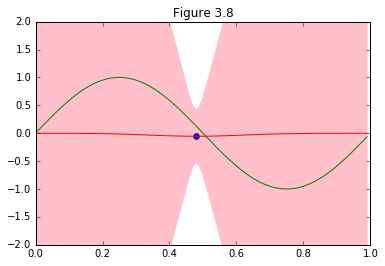

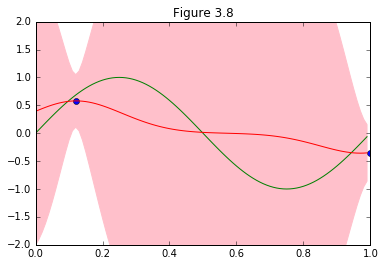

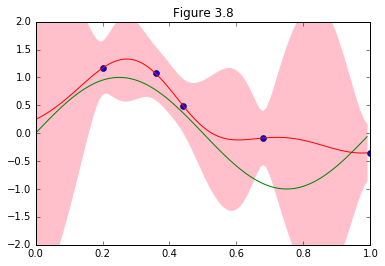

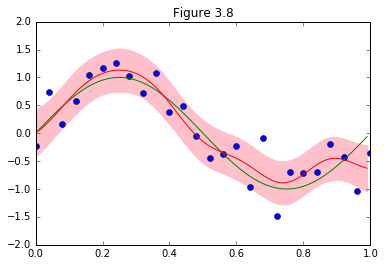

In [47]:
#PRML3章ベイズ線形回帰
%matplotlib inline
import numpy as np
from numpy.linalg import inv
import pandas as pd
from pylab import *
import matplotlib.pyplot as plt

def bayes_regression(x_trains,y_trains):
    M = 9
    alfa = 0.1
    beta = 9.0
    s = 0.1
    
    def phi(x,mu_array):
        return np.array([exp(-(x-mu)**2 / (2 * s ** 2)) for mu in mu_array]).reshape((M,1))
    
    def Sn_inv(x_array,mu_array):
        alfa_I = np.identity(M) * alfa
        d_m = design_matrix(x_array,mu_array)
        return alfa_I + beta * np.dot(d_m.T,d_m)
    
    def Sn(Sn_inv):
        return np.linalg.inv(Sn_inv)
    
    def design_matrix(x_array,mu_array):
        d_m = np.zeros([len(x_array),M])
        for i in range(len(x_array)):
            d_array = phi(x_array[i],mu_array).T
            d_m[i] = d_array
        return d_m
    
    def mN(SN,dm,y_trains):
        return beta*np.dot(SN,np.dot(dm.T,y_trains)).reshape((M,1))
    
    def sigma(x,Sn,mu_array):
        return 1/beta + phi(x,mu_array).T.dot(Sn).dot(phi(x,mu_array))
    
    def prediction_m(x,mu_array,mN):
        return mN.T.dot(phi(x,mu_array))
        
    #訓練データから各パラメータ導出
    mu_array = np.linspace(0, 1, M)
    design_matrix(x_trains,mu_array)
    dm = design_matrix(x_trains,mu_array)
    sn_inv = Sn_inv(x_trains,mu_array)
    sn = Sn(sn_inv)
    mn = mN(sn,dm,y_trains)

    #Sine curve
    x_real = np.arange(0, 1, 0.01)
    y_real = np.sin(2*np.pi*x_real)
    
    mean = [prediction_m(x,mu_array,mn)[0,0] for x in x_real]
    variance = [sigma(x,sn,mu_array)[0,0] for x in x_real]
    SD = np.sqrt(variance)
    upper = mean + SD
    lower = mean - SD

    plot(x_trains, y_trains, 'bo')
    plot(x_real, y_real, 'g-')
    plot(x_real, mean, 'r-')
    fill_between(x_real, upper, lower, color='pink')
    xlim(0.0, 1.0)
    ylim(-2, 2)
    title("Figure 3.8")
    show()    
    
x_train = np.linspace(0, 1, 26)

#Set "small level of random noise having a Gaussian distribution"
loc = 0
scale = 0.3
y_train =  np.sin(2*np.pi*x_train) + np.random.normal(loc,scale,26)

#Sample data pick up
def randidx(n, k):
    r = list(range(n))
    shuffle(r)
    return sort(r[0:k])

for k in (1, 2, 5, 26):
    indices = randidx(size(x_train), k)
    #print(type(indices))
    bayes_regression(x_train[indices],y_train[indices])
